## Мобильная классификация цен 

Набор данных состоит из почти 2000 записей о характеристиках мобильных телефонов (объем оперативной памяти, размер и т.д.), технических характеристиках и т.д., а также их ценовом диапазоне. 

#### Импортируем необходимые библиотеки:

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot , plot 
import plotly.express as px 

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [42]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [44]:
test.head(10)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
5,6,1464,1,2.9,1,5,1,50,0.8,198,...,9,569,939,3506,10,7,3,1,1,1
6,7,1718,0,2.4,0,1,0,47,1.0,156,...,3,1283,1374,3873,14,2,10,0,0,0
7,8,833,0,2.4,1,0,0,62,0.8,111,...,2,1312,1880,1495,7,2,18,0,1,1
8,9,1111,1,2.9,1,9,1,25,0.6,101,...,19,556,876,3485,11,9,10,1,1,0
9,10,1520,0,0.5,0,1,0,25,0.5,171,...,20,52,1009,651,6,0,5,1,0,1


### Описание данных
Признаки:
- battery_power – Общее количество энергии, которое батарея может накопить за один раз, измеряется в мАч.
- blue – Есть Bluetooth или нет.
- clock_speed – скорость, с которой микропроцессор выполняет команды.
- dual_sim – Поддерживает две sim-карты или нет.
- fc – Количество мегапикселей фронтальной камеры.
- four_g – Есть 4G или нет.
- int_memory – Объем встроенной памяти в гигабайтах.
- m_dep – Глубина камеры в сантиметрах.
- mobile_wt – Вес мобильного телефона.
- n_cores – Количество ядер процессора.
- pc - Мегапиксели основной камеры.
- px_height – Высота разрешения в пикселях.
- px_width – Ширина разрешения в пикселях.
- ram – Оперативная память в мегабайтах.
- sc_h – Высота экрана мобильного устройства в сантиметрах.
- sc_w – Ширина экрана мобильного устройства в сантиметрах.
- talk_time – Максимальное время, на которое хватит одной зарядки аккумулятора.
- three_g – Есть 3G или нет.
- touch_screen – Есть сенсорный экран или нет.
- wifi – Есть Wi-Fi или нет.
- price_range – Это целевая переменная со значением 0 (низкая стоимость), 1 (средняя стоимость), 2 (высокая стоимость) и 3 (очень высокая стоимость).

In [47]:
# объём данных (строк и столбцов - объектов и признаков)
test.shape

(1000, 21)

In [49]:
# выводим типы данных
test.dtypes

id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

Все данные в порядке

In [52]:
# имена колонок в виде списка
test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [54]:
for col in test.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, test[col].isna().sum()))

Кол-во пропусков в колонке id = 0
Кол-во пропусков в колонке battery_power = 0
Кол-во пропусков в колонке blue = 0
Кол-во пропусков в колонке clock_speed = 0
Кол-во пропусков в колонке dual_sim = 0
Кол-во пропусков в колонке fc = 0
Кол-во пропусков в колонке four_g = 0
Кол-во пропусков в колонке int_memory = 0
Кол-во пропусков в колонке m_dep = 0
Кол-во пропусков в колонке mobile_wt = 0
Кол-во пропусков в колонке n_cores = 0
Кол-во пропусков в колонке pc = 0
Кол-во пропусков в колонке px_height = 0
Кол-во пропусков в колонке px_width = 0
Кол-во пропусков в колонке ram = 0
Кол-во пропусков в колонке sc_h = 0
Кол-во пропусков в колонке sc_w = 0
Кол-во пропусков в колонке talk_time = 0
Кол-во пропусков в колонке three_g = 0
Кол-во пропусков в колонке touch_screen = 0
Кол-во пропусков в колонке wifi = 0


In [56]:
# проверка на отсутствующие значения для всех колонок датафрейма
test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [58]:
# описательная статистика для всех (числовых) признаков
test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1000.0,500.5000,288.819436,1.0,250.75,500.5,750.25,1000.0
battery_power,1000.0,1248.5100,432.458227,500.0,895.00,1246.5,1629.25,1999.0
blue,1000.0,0.5160,0.499994,0.0,0.00,1.0,1.00,1.0
clock_speed,1000.0,1.5409,0.829268,0.5,0.70,1.5,2.30,3.0
dual_sim,1000.0,0.5170,0.499961,0.0,0.00,1.0,1.00,1.0
fc,1000.0,4.5930,4.463325,0.0,1.00,3.0,7.00,19.0
four_g,1000.0,0.4870,0.500081,0.0,0.00,0.0,1.00,1.0
int_memory,1000.0,33.6520,18.128694,2.0,18.00,34.5,49.00,64.0
m_dep,1000.0,0.5175,0.280861,0.1,0.30,0.5,0.80,1.0
mobile_wt,1000.0,139.5110,34.851550,80.0,109.75,139.0,170.00,200.0


In [60]:
feat = ["battery_power", "blue", "clock_speed", "dual_sim", "fc", "four_g","int_memory","m_dep","mobile_wt","n_cores","pc",
        "px_height", "px_width", "ram","sc_h","sc_w","talk_time","three_g","touch_screen","wifi","price_range"]

In [62]:
corr = train[feat].corr()
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


### Визуальный анализ

<Figure size 2800x2600 with 0 Axes>

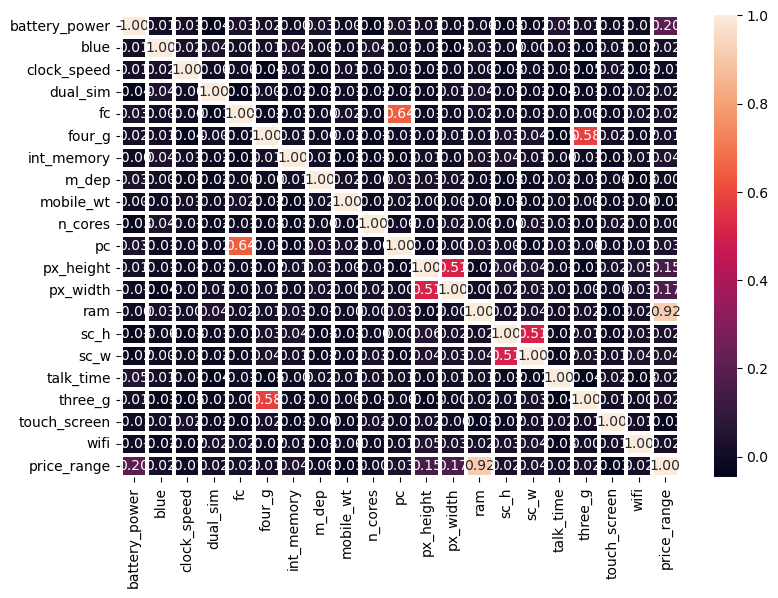

In [81]:
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

### Предообработка данных

In [84]:
train.head(5).T

,0,1,2,3,4
battery_power,842.0,1021.0,563.0,615.0,1821.0
blue,0.0,1.0,1.0,1.0,1.0
clock_speed,2.2,0.5,0.5,2.5,1.2
dual_sim,0.0,1.0,1.0,0.0,0.0
fc,1.0,0.0,2.0,0.0,13.0
four_g,0.0,1.0,1.0,0.0,1.0
int_memory,7.0,53.0,41.0,10.0,44.0
m_dep,0.6,0.7,0.9,0.8,0.6
mobile_wt,188.0,136.0,145.0,131.0,141.0
n_cores,2.0,3.0,5.0,6.0,2.0


In [86]:
train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [88]:
train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

#### Обучение модели

In [93]:
from sklearn.model_selection import train_test_split
# объединение изначальных признаков и фиктивных бинарных признаков - формирование матрицы Объекты-признаки
X = pd.concat([train[feat]], axis=1)
X.shape

(2000, 21)

In [95]:
X.head(5).T

,0,1,2,3,4
battery_power,842.0,1021.0,563.0,615.0,1821.0
blue,0.0,1.0,1.0,1.0,1.0
clock_speed,2.2,0.5,0.5,2.5,1.2
dual_sim,0.0,1.0,1.0,0.0,0.0
fc,1.0,0.0,2.0,0.0,13.0
four_g,0.0,1.0,1.0,0.0,1.0
int_memory,7.0,53.0,41.0,10.0,44.0
m_dep,0.6,0.7,0.9,0.8,0.6
mobile_wt,188.0,136.0,145.0,131.0,141.0
n_cores,2.0,3.0,5.0,6.0,2.0


In [99]:
# выделение целевой переменной (таргета) в отдельный вектор
y = train["price_range"]
y.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [103]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [105]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1340, 21) (660, 21) (1340,) (660,)


In [107]:
from sklearn.metrics import accuracy_score

## KNeighborsClassifier (Классификация ближайших соседей)

In [111]:
from sklearn.neighbors import KNeighborsClassifier

In [113]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 2 ms


KNeighborsClassifier()

In [117]:
#составление прогноза
knn.predict(X_test)

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       3, 2, 2, 1, 3, 1, 3, 1, 0, 0, 0, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 0, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 2, 2, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 2, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 3, 0, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 2, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 0, 3, 3, 1, 3, 3, 3, 3, 3, 0, 2, 2,
       2, 1, 3, 0, 2, 3, 2, 2, 2, 1, 0, 1, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 2, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

In [119]:
knn_pred_test = knn.predict(X_test)
display(knn_pred_test[:20], np.array(y_test[:20]))

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 2, 2, 3, 3, 1, 0],
      dtype=int64)

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 2, 3, 3, 2, 3, 3, 1, 0],
      dtype=int64)

In [121]:
#измерение производительности
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  0.9537313432835821
test accuracy:  0.9212121212121213


In [123]:
knn_accuracy = accuracy_score(y_test, y_test_predict, normalize=True)

## Gaussian Naive Bayes (НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР)

In [126]:
from sklearn.naive_bayes import GaussianNB

In [128]:
%%time

gnb = GaussianNB()
gnb.fit(X, y)

CPU times: total: 0 ns
Wall time: 2 ms


GaussianNB()

In [130]:
gnb_pred_test = gnb.predict(X_test)
display(gnb_pred_test[:20], np.array(y_test[:20]))

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 2, 3, 3, 2, 3, 3, 1, 0],
      dtype=int64)

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 2, 3, 3, 2, 3, 3, 1, 0],
      dtype=int64)

In [134]:
# измерение производительности
from sklearn.metrics import accuracy_score
accuracy_score(y_test, gnb_pred_test)

1.0

In [136]:
gnb_accuracy = accuracy_score(y_test, gnb_pred_test)

## Random Forest Classifier (Классификатор дерева решений)

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
%%time
rfc  = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

CPU times: total: 312 ms
Wall time: 219 ms


In [143]:
rfc_pred_test = rfc.predict(X_test)
display(rfc_pred_test[:20], np.array(y_test[:20]))

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 2, 3, 3, 2, 3, 3, 1, 0],
      dtype=int64)

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 2, 3, 3, 2, 3, 3, 1, 0],
      dtype=int64)

In [145]:
# измерение производительности
from sklearn.metrics import accuracy_score

In [147]:
rfc_accuracy = accuracy_score(y_test, rfc_pred_test)

## Logistic Regression (Логистическая регрессия)

In [150]:
from sklearn.linear_model import LogisticRegression

In [152]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [154]:
%%time
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

CPU times: total: 406 ms
Wall time: 94 ms


LogisticRegression(random_state=42)

In [156]:
lr_pred_test = lr.predict(X_test)
display(lr_pred_test[:20], np.array(y_test[:20]))

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 2, 3, 3, 2, 3, 3, 1, 0],
      dtype=int64)

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 2, 3, 3, 2, 3, 3, 1, 0],
      dtype=int64)

In [158]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lr_pred_test)

1.0

In [160]:
lr_accuracy = accuracy_score(y_test, lr_pred_test)

## Метрики классификации

In [163]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report

In [165]:
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier", "Logistic Regression"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, gnb_accuracy, rfc_accuracy, lr_accuracy]

In [167]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.921212
1,Gaussian Naive Bayes,1.000000
2,Random Forest Classifier,1.000000
3,Logistic Regression,1.000000


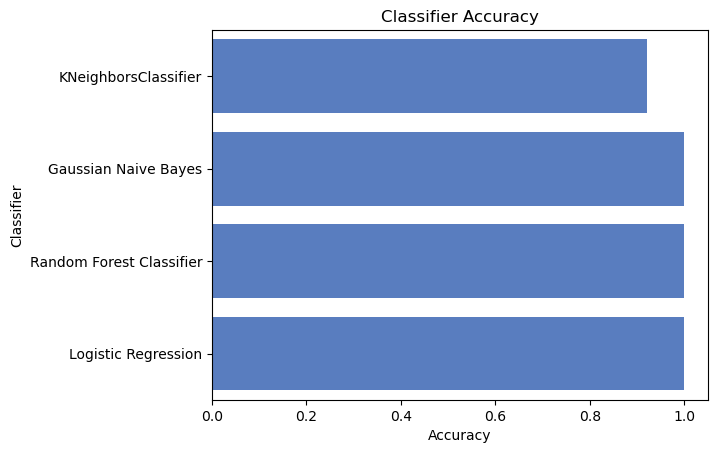

In [169]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b");
plt.show()

In [173]:
# измерение производительности
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

In [175]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [177]:
cm = confusion_matrix(y_test, y_test_predict)
cm

array([[169,   0,   0,   0],
       [162,   0,   0,   0],
       [162,   0,   0,   0],
       [167,   0,   0,   0]], dtype=int64)

## Визуализация confusion matrix

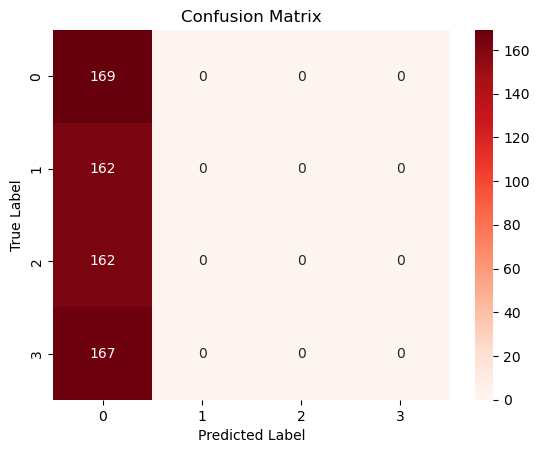

In [180]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

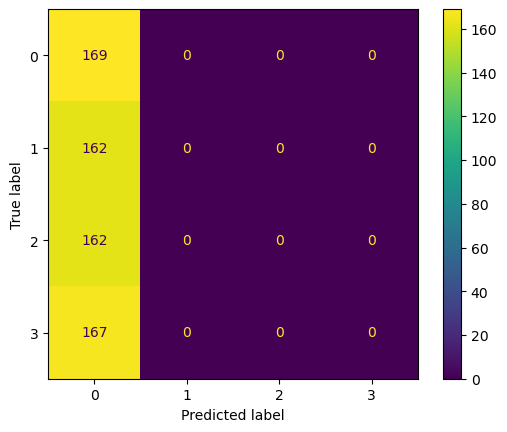

In [182]:
cm = confusion_matrix(y_test, y_test_predict, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn.classes_)
disp.plot()
plt.show()

## Accuracy (Точность)

__Точность__ — это доля правильно классифицированных объектов среди всех объектов. Эта метрика является одной из самых простых и интуитивно понятных, однако она может быть не всегда полезна, особенно в случае несбалансированных классов. Например, если у вас есть 90% примеров одного класса и 10% другого, модель, которая всегда предсказывает более частый класс, будет иметь высокую точность, но низкую полезность.

In [184]:
print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  0.24701492537313433
test accuracy:  0.25606060606060604


Сопряженная ей метрика — **доля ошибочных классификаций (error rate)**: Error rate=1−Accuracy

In [186]:
print('test mean_squared_error: ', mean_squared_error(y_test, y_test_predict))
print('test mean_absolute_error: ', mean_absolute_error(y_test, y_test_predict))

test mean_squared_error:  3.5045454545454544
test mean_absolute_error:  1.4954545454545454


## Полная информация

In [203]:
print(classification_report( y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.26      1.00      0.41       169
           1       0.00      0.00      0.00       162
           2       0.00      0.00      0.00       162
           3       0.00      0.00      0.00       167

    accuracy                           0.26       660
   macro avg       0.06      0.25      0.10       660
weighted avg       0.07      0.26      0.10       660

